## <font face="微软雅黑"><center>《机器学习》</center></font>

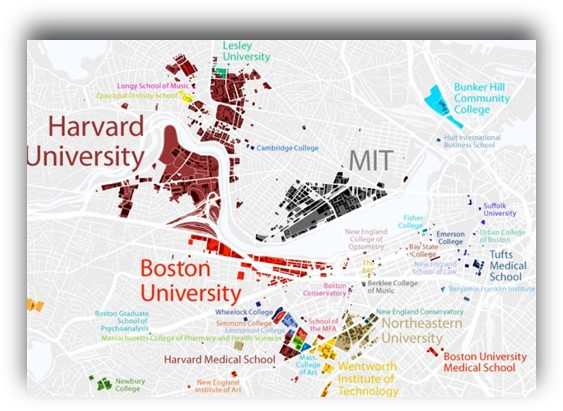



#  <font color=#0099ff  face="微软雅黑"><center>实验二 波士顿房价预测</center></font>

## 实验要求：
<hr width="100%" style="margin-top:10px;border:0.5px solid black;"/>

### 【实验目的】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> 
通过本实验，深入了解回归算法的实现原理，掌握线性回归算法的参数优化
</div>

### 【实验环境】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> Windows Anconda  Jupyter Notebook </div>
    
### 【实验内容】

在这个实验中将分析波士顿房价数据，在这个过程中将应用线性回归算法对波士顿房价进行预测


### 【预备知识】

机器学习流程、特征工程技巧、回归模型评价、回归算法


### 【实验背景】

通过机器学习可以预测房价走势


##  <font color='red'  face="微软雅黑">*注意*：所有注释后的空行均需填入代码</font> 

##  <font color='red'  face="微软雅黑">*注意*：最后交的是实验报告word文件</font> 

##  <font color='red'  face="微软雅黑">*注意*：实验报告务必写学号、姓名、班级</font> 

# 数据集字段说明

### 字段对应的中文解释，来自网上的说明：

#### CRIM：城镇人均犯罪率

#### ZN： 占地面积超过2.5万平方英尺的住宅用地比例

#### INDUS：城镇上非零售业务地区的 比例

#### CHAS：虚拟变量；如果土地在查尔斯河，取值1；否则为0

#### NOX：一氧化氮浓度

#### RM：平均每个居民房数

#### AGE：在1940年之前建成的所有者占用单位的比例

#### DIS： 与波士顿的5个就业中心之间的加权距离

#### RAD： 距离住房最近的公路入口编号

#### TAX：每10,000美元的全额物业税

#### PTRATIO：城镇师生比例大小

#### B：1000(Bk-0.63)^2,其中 Bk 指代城镇中黑人的比例

#### LSTAT：全部人口中地位较低人群的百分数大小

#### MEDV：目标变量，以1000美元来进行计算的自由住房的中位数大小


## 3 波士顿房价预测

## 3-1 读取数据

In [1]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# 从从本地文件（HousingData.csv）中读取原始数据，并输出前五行数据
data = pd.read_csv('HousingData.csv')
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [4]:
#查看数据大小
data.shape

(506, 14)

In [5]:
# 一次性查看数据的特征、是否有缺失值、数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
#查看数据统计特征
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
# 查看是否存在重复值
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [8]:
# 查看整个数据集是否存在重复值
data.duplicated().any()

False

##  3-2 缺失值处理

###  删除缺失值

In [9]:
#删除有缺失的样本
data = data.dropna()

In [11]:
#重新检查数据集是否存在缺失值
data.duplicated()

0      False
1      False
2      False
3      False
5      False
       ...  
499    False
500    False
502    False
503    False
504    False
Length: 394, dtype: bool

## 3-3  计算相关系数

In [12]:
# 特征间相关系数
cor = data.corr()
cor

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.188075  0.391552 -0.051970  0.416160 -0.227170  0.341311   
ZN      -0.188075  1.000000 -0.521256 -0.033357 -0.515660  0.343210 -0.568174   
INDUS    0.391552 -0.521256  1.000000  0.049820  0.762737 -0.403068  0.642387   
CHAS    -0.051970 -0.033357  0.049820  1.000000  0.076661  0.095308  0.072644   
NOX      0.416160 -0.515660  0.762737  0.076661  1.000000 -0.316563  0.732540   
RM      -0.227170  0.343210 -0.403068  0.095308 -0.316563  1.000000 -0.248670   
AGE      0.341311 -0.568174  0.642387  0.072644  0.732540 -0.248670  1.000000   
DIS     -0.365052  0.645359 -0.696569 -0.095037 -0.768137  0.218713 -0.753547   
RAD      0.608667 -0.298773  0.591944  0.014102  0.628170 -0.236057  0.443585   
TAX      0.560841 -0.305768  0.734204 -0.026513  0.679824 -0.320561  0.504472   
PTRATIO  0.265428 -0.422164  0.395691 -0.104995  0.210216 -0.390686  0.264968   
B       -0.386254  0.169894 -0.344788  0.068913 -0.384257  0.123320 -0.281990   
LSTAT    0.461906 -0.415041  0.598156 -0.037113  0.593655 -0.636226  0.601137   
MEDV    -0.397230  0.406822 -0.510829  0.173701 -0.459054  0.723951 -0.407470   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.365052  0.608667  0.560841  0.265428 -0.386254  0.461906 -0.397230  
ZN       0.645359 -0.298773 -0.305768 -0.422164  0.169894 -0.415041  0.406822  
INDUS   -0.696569  0.591944  0.734204  0.395691 -0.344788  0.598156 -0.510829  
CHAS    -0.095037  0.014102 -0.026513 -0.104995  0.068913 -0.037113  0.173701  
NOX     -0.768137  0.628170  0.679824  0.210216 -0.384257  0.593655 -0.459054  
RM       0.218713 -0.236057 -0.320561 -0.390686  0.123320 -0.636226  0.723951  
AGE     -0.753547  0.443585  0.504472  0.264968 -0.281990  0.601137 -0.407470  
DIS      1.000000 -0.477075 -0.529603 -0.228840  0.285168 -0.505036  0.279547  
RAD     -0.477075  1.000000  0.900000  0.441949 -0.444135  0.510868 -0.416638  
TAX     -0.529603  0.900000  1.000000  0.446961 -0.435457  0.572218 -0.508864  
PTRATIO -0.228840  0.441949  0.446961  1.000000 -0.179816  0.395006 -0.543809  
B        0.285168 -0.444135 -0.435457 -0.179816  1.000000 -0.383783  0.347256  
LSTAT   -0.505036  0.510868  0.572218  0.395006 -0.383783  1.000000 -0.743450  
MEDV     0.279547 -0.416638 -0.508864 -0.543809  0.347256 -0.743450  1.000000

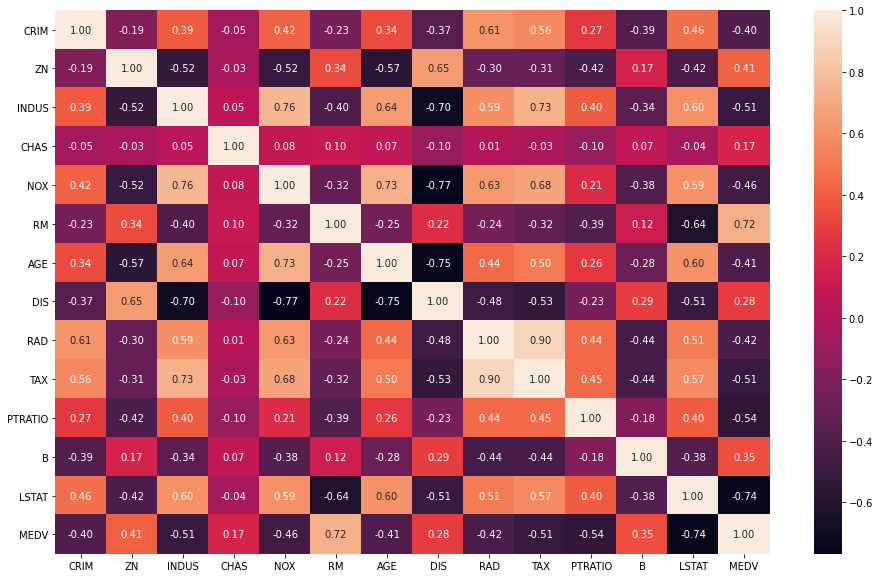

In [13]:
# 由于上述相关系数矩阵不方便直接用肉眼看出，所以一般画热力图直观展示

import seaborn as sns

# 特征间相关系数热力图
plt.figure(figsize=(16,10))
sns.heatmap(cor,annot=True,fmt=".2f")
plt.show()

##### Seaborn是基于matplotlib的Python可视化库。它提供了一个高级界面来绘制有吸引力的统计图形。Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，不需要经过大量的调整就能使你的图变得精致
#### seaborn.heatmap(data, , annot=None, fmt='.2g'）
#### data：数据
#### annot: 默认为False，如果为True，则在每个热力图单元格中写入数据值
#### fmt：format的缩写，设置数值的格式化形式

In [16]:
#查看每个特征和目标变量MEDV之间的相关系数：
cor['MEDV'].sort_values()

LSTAT     -0.743450
PTRATIO   -0.543809
INDUS     -0.510829
TAX       -0.508864
NOX       -0.459054
RAD       -0.416638
AGE       -0.407470
CRIM      -0.397230
CHAS       0.173701
DIS        0.279547
B          0.347256
ZN         0.406822
RM         0.723951
MEDV       1.000000
Name: MEDV, dtype: float64

## 通过观察特征与标签的相关系数，选择合适的特征进行模型训练（提示：相关系数绝对值大于0.5，可被选择为优质特征，请在下框中回答：优质特征有哪些

### 优质特征：INDUS RM TAX PTRATIO LSTAT 

## 3-4 划分数据，训练模型、模型预测
### 将数据集划分为测试集和训练集。训练集用于训练模型，测试集主要用于测试模型的训练效果。

In [23]:
#从sklearn导入train_test_split
from sklearn.model_selection import train_test_split


# 将上述选出的优质特征作为X进行训练，Y 为目标变量 MEDV
x = data[['INDUS','RM','TAX','PTRATIO','LSTAT']]
y = data['MEDV']

# 将数据分为训练集和测试集两部分
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 1)

## 3-5 模型训练

### 采用线性回归模型LinearRegression进行训练及预测

In [24]:
# 从sklearn导入 LinearRegression

from sklearn.linear_model import LinearRegression

# 建立线性回归模型
model = LinearRegression()

# 使用训练数据进行参数估计，训练模型
LR = model.fit(x_train,y_train)

#求解f(x)=wx+b模型

w = LR.coef_                      #求系数
b = LR.intercept_                 #求截距

# 打印出 W 和 b 的值
print("w = ",LR.coef_,"b=",LR.intercept_)

w =  [ 5.51729786e-02  4.44947774e+00 -3.62784164e-03 -8.62522083e-01
 -5.65706334e-01] b= 18.40835109285596


In [31]:
# 打印出拟合函数
print("拟合模型：y = %f * x1 + %f * x2 + %f * x3 + %f *x4 + %f * x5 + %f" %(w[0],w[1],w[2],w[3],w[4],w[5],b))

IndexError: index 5 is out of bounds for axis 0 with size 5

In [26]:
# 用模型在测试集上预测





## 3-6 模型评估

### r2_score()函数可以表示特征模型对特征样本预测的好坏，即确定系数; 以及均方误差MSE

In [17]:
# 使用均方误差和判定系数作为评价指标



# The mean squared error   #均方误差




# The coefficient of determination: 1 is perfect prediction  #判定系数




Mean squared error: 23.84
Coefficient of determination: 0.73


## 根据MSE和R2给出结论（如模型是否够好，模型解释了多少的变量）将结论写在下方框

### 结论：